## Ontario, CA Demography

#### setting up map sources

In [19]:
import pandas as pd
import geopandas as gpd
import plotly as plt
import folium

#### uploading EJI data for San Bernardino

In [20]:
eji = gpd.read_file('../Data/EJI/EJISanBernardino.geojson')

In [3]:
#### setting up coordinate reference system

In [21]:
eji.crs = 'epsg:4326'

#### uploading census tract data for Ontario

In [22]:
ct = pd.read_csv('ontario.csv',
                 dtype=
                 {
                     'STATEFP':str,
                     'COUNTYFP':str,
                     'GEOID':str,
                     'geometry':object,
                 })
# viewing data headers
ct.head

<bound method NDFrame.head of     Unnamed: 0 STATEFP COUNTYFP  TRACTCE              AFFGEOID        GEOID  \
0          435      06      071     1307  1400000US06071001307  06071001307   
1          436      06      071     1703  1400000US06071001703  06071001703   
2          437      06      071     1812  1400000US06071001812  06071001812   
3          717      06      071     1002  1400000US06071001002  06071001002   
4          718      06      071     1310  1400000US06071001310  06071001310   
5          719      06      071     1503  1400000US06071001503  06071001503   
6          720      06      071     1707  1400000US06071001707  06071001707   
7          721      06      071     1810  1400000US06071001810  06071001810   
8         1627      06      071     1101  1400000US06071001101  06071001101   
9         2637      06      071     1308  1400000US06071001308  06071001308   
10        3262      06      071     1808  1400000US06071001808  06071001808   
11        3503      06

In [23]:
#checking data types
ct.dtypes

Unnamed: 0      int64
STATEFP        object
COUNTYFP       object
TRACTCE         int64
AFFGEOID       object
GEOID          object
NAME          float64
LSAD           object
ALAND           int64
AWATER          int64
geometry       object
dtype: object

#### setting up to use the geometry column

In [24]:
from shapely.wkt import loads
ct.geometry=ct['geometry'].apply(loads)

In [25]:
ct=ct.set_geometry('geometry')

#### merging eji/ct datasets

In [26]:
eji=pd.merge(eji,ct, how='right', indicator=True, left_on = 'geoid', right_on = 'GEOID')
eji

,objectid,statefp,countyfp,tractce,affgeoid,geoid,name,county,stateabbr,statedesc,...,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry_y,_merge
0,8895,06,071,001307,1400000US06071001307,06071001307,13.07,San Bernardino,CA,Califor,...,071,1307,1400000US06071001307,06071001307,13.07,CT,1281879,0,"POLYGON ((-117.62857 34.09215, -117.62856 34.0...",both
1,8907,06,071,001703,1400000US06071001703,06071001703,17.03,San Bernardino,CA,Califor,...,071,1703,1400000US06071001703,06071001703,17.03,CT,1909759,0,"POLYGON ((-117.66764 34.03029, -117.66760 34.0...",both
2,8917,06,071,001812,1400000US06071001812,06071001812,18.12,San Bernardino,CA,Califor,...,071,1812,1400000US06071001812,06071001812,18.12,CT,888388,0,"POLYGON ((-117.65077 34.04925, -117.65074 34.0...",both
3,8889,06,071,001002,1400000US06071001002,06071001002,10.02,San Bernardino,CA,Califor,...,071,1002,1400000US06071001002,06071001002,10.02,CT,1203162,0,"POLYGON ((-117.68082 34.07406, -117.68082 34.0...",both
4,8898,06,071,001310,1400000US06071001310,06071001310,13.10,San Bernardino,CA,Califor,...,071,1310,1400000US06071001310,06071001310,13.10,CT,1417244,0,"POLYGON ((-117.64146 34.08708, -117.64144 34.0...",both
5,8903,06,071,001503,1400000US06071001503,06071001503,15.03,San Bernardino,CA,Califor,...,071,1503,1400000US06071001503,06071001503,15.03,CT,553555,0,"POLYGON ((-117.63481 34.07071, -117.63481 34.0...",both
6,8910,06,071,001707,1400000US06071001707,06071001707,17.07,San Bernardino,CA,Califor,...,071,1707,1400000US06071001707,06071001707,17.07,CT,1709523,0,"POLYGON ((-117.66979 34.04916, -117.66992 34.0...",both
7,8916,06,071,001810,1400000US06071001810,06071001810,18.10,San Bernardino,CA,Califor,...,071,1810,1400000US06071001810,06071001810,18.10,CT,988342,0,"POLYGON ((-117.65071 34.03745, -117.65069 34.0...",both
8,8890,06,071,001101,1400000US06071001101,06071001101,11.01,San Bernardino,CA,Califor,...,071,1101,1400000US06071001101,06071001101,11.01,CT,791646,0,"POLYGON ((-117.67006 34.06878, -117.67006 34.0...",both
9,8896,06,071,001308,1400000US06071001308,06071001308,13.08,San Bernardino,CA,Califor,...,071,1308,1400000US06071001308,06071001308,13.08,CT,1077531,0,"POLYGON ((-117.61986 34.08490, -117.61980 34.0...",both


#### viewing and filtering column data

In [27]:
list(eji)

['objectid',
 'statefp',
 'countyfp',
 'tractce',
 'affgeoid',
 'geoid',
 'name',
 'county',
 'stateabbr',
 'statedesc',
 'location',
 'e_totpop',
 'm_totpop',
 'e_daypop',
 'spl_eji',
 'rpl_eji',
 'spl_ser',
 'rpl_ser',
 'epl_ozone',
 'epl_pm',
 'epl_dslpm',
 'epl_totcr',
 'spl_ebm_theme1',
 'rpl_ebm_dom1',
 'epl_npl',
 'epl_tri',
 'epl_tsd',
 'epl_rmp',
 'epl_coal',
 'epl_lead',
 'spl_ebm_theme2',
 'rpl_ebm_dom2',
 'epl_park',
 'epl_houage',
 'epl_wlkind',
 'spl_ebm_theme3',
 'rpl_ebm_dom3',
 'epl_rail',
 'epl_road',
 'epl_airprt',
 'spl_ebm_theme4',
 'rpl_ebm_dom4',
 'epl_impwtr',
 'spl_ebm_theme5',
 'rpl_ebm_dom5',
 'spl_ebm',
 'rpl_ebm',
 'epl_minrty',
 'spl_svm_dom1',
 'rpl_svm_dom1',
 'epl_pov200',
 'epl_nohsdp',
 'epl_unemp',
 'epl_renter',
 'epl_houbdn',
 'epl_uninsur',
 'epl_noint',
 'spl_svm_dom2',
 'rpl_svm_dom2',
 'epl_age65',
 'epl_age17',
 'epl_disabl',
 'epl_limeng',
 'spl_svm_dom3',
 'rpl_svm_dom3',
 'epl_mobile',
 'epl_groupq',
 'spl_svm_dom4',
 'rpl_svm_dom4',
 'spl_

In [28]:
## eliminating unwanted columns and creating a set of columns to keep (ctk)
##this includes general data (e.g, total population), social vulnerability indicators, and geography/geometry data
ctk = ['statefp',
 'countyfp',
 'affgeoid',
 'geoid',
 'county',
 'location',
 'e_totpop',
 'e_daypop',
 'epl_minrty',
 'epl_pov200',
 'epl_nohsdp',
 'epl_unemp',
 'epl_renter',
 'epl_houbdn',
 'epl_uninsur',
 'epl_noint',
 'epl_age65',
 'epl_age17',
 'epl_disabl',
 'epl_limeng',
 'epl_mobile',
 'geometry_x',
 'SHAPE__Length',
 'SHAPE__Area',
 'geometry_y']

In [29]:
#creating new dataframe and reviewing remaining columns
eji2 = eji[ctk]
eji2.head()

,statefp,countyfp,affgeoid,geoid,county,location,e_totpop,e_daypop,epl_minrty,epl_pov200,...,epl_noint,epl_age65,epl_age17,epl_disabl,epl_limeng,epl_mobile,geometry_x,SHAPE__Length,SHAPE__Area,geometry_y
0,06,071,1400000US06071001307,06071001307,San Bernardino,"Census Tract 13.07, San Bernardino County, Calif",4212,2345,0.8805,0.6010,...,0.4223,0.1442,0.7724,0.2400,0.8764,0.0000,"POLYGON ((-1963807.20900 -157069.92780, -19639...",4784.119192,1.282029e+06,"POLYGON ((-117.62857 34.09215, -117.62856 34.0..."
1,06,071,1400000US06071001703,06071001703,San Bernardino,"Census Tract 17.03, San Bernardino County, Calif",5680,2388,0.7894,0.3592,...,0.1064,0.3748,0.3137,0.1654,0.8417,0.8008,"POLYGON ((-1968855.23160 -162996.94260, -19689...",5575.388721,1.908278e+06,"POLYGON ((-117.66764 34.03029, -117.66760 34.0..."
2,06,071,1400000US06071001812,06071001812,San Bernardino,"Census Tract 18.12, San Bernardino County, Calif",3477,2913,0.9237,0.8559,...,0.7864,0.2360,0.7568,0.4277,0.9465,0.0000,"POLYGON ((-1966870.45630 -161282.11530, -19670...",4243.720821,8.871496e+05,"POLYGON ((-117.65077 34.04925, -117.65074 34.0..."
3,06,071,1400000US06071001002,06071001002,San Bernardino,"Census Tract 10.02, San Bernardino County, Calif",5929,1960,0.9182,0.7073,...,0.7367,0.0565,0.9135,0.1310,0.9097,0.0000,"POLYGON ((-1969106.41240 -158735.28010, -19691...",4410.506266,1.202110e+06,"POLYGON ((-117.68082 34.07406, -117.68082 34.0..."
4,06,071,1400000US06071001310,06071001310,San Bernardino,"Census Tract 13.10, San Bernardino County, Calif",6193,2689,0.8778,0.5535,...,0.3971,0.2887,0.8183,0.3372,0.9020,0.5234,"POLYGON ((-1965084.27710 -157355.52200, -19652...",5320.830383,1.414418e+06,"POLYGON ((-117.64146 34.08708, -117.64144 34.0..."


In [30]:
#creating sample of df
eji2.sample(10)

,statefp,countyfp,affgeoid,geoid,county,location,e_totpop,e_daypop,epl_minrty,epl_pov200,...,epl_noint,epl_age65,epl_age17,epl_disabl,epl_limeng,epl_mobile,geometry_x,SHAPE__Length,SHAPE__Area,geometry_y
11,06,071,1400000US06071000304,06071000304,San Bernardino,"Census Tract 3.04, San Bernardino County, Califo",6223,4775,0.8805,0.6535,...,0.5115,0.3278,0.5316,0.5578,0.9637,0.7889,"POLYGON ((-1971621.51480 -158975.96300, -19718...",7544.299389,3.271730e+06,"POLYGON ((-117.70697 34.05973, -117.70683 34.0..."
19,06,071,1400000US06071012700,06071012700,San Bernardino,"Census Tract 127, San Bernardino County, Califor",3920,58829,0.8263,0.2075,...,0.3043,0.1088,0.8310,0.0625,0.7821,0.5665,"POLYGON ((-1961280.03420 -160457.64670, -19614...",28670.738574,2.681420e+07,"POLYGON ((-117.59336 34.06772, -117.59336 34.0..."
5,06,071,1400000US06071001503,06071001503,San Bernardino,"Census Tract 15.03, San Bernardino County, Calif",4126,1163,0.9399,0.9497,...,0.8619,0.0291,0.9821,0.2328,0.9842,0.7717,"POLYGON ((-1965213.89480 -159622.04810, -19653...",3172.382073,5.525096e+05,"POLYGON ((-117.63481 34.07071, -117.63481 34.0..."
27,06,071,1400000US06071001312,06071001312,San Bernardino,"Census Tract 13.12, San Bernardino County, Calif",5127,2821,0.9003,0.6040,...,0.3157,0.1088,0.5466,0.4201,0.8490,0.8388,"POLYGON ((-1962252.20970 -157439.78530, -19624...",7878.656732,2.681963e+06,"POLYGON ((-117.61112 34.09206, -117.61121 34.0..."
13,06,071,1400000US06071001309,06071001309,San Bernardino,"Census Tract 13.09, San Bernardino County, Calif",4658,2374,0.9126,0.4329,...,0.4441,0.3858,0.5761,0.3057,0.9485,0.0000,"POLYGON ((-1964379.45130 -158145.82920, -19644...",5754.274321,1.309869e+06,"POLYGON ((-117.63002 34.08160, -117.63201 34.0..."
37,06,071,1400000US06071002109,06071002109,San Bernardino,"Census Tract 21.09, San Bernardino County, Calif",6121,25939,0.8184,0.5935,...,0.1523,0.0400,0.4497,0.0700,0.5088,0.0000,"POLYGON ((-1961035.84400 -159388.50270, -19612...",11044.202365,4.840589e+06,"POLYGON ((-117.59339 34.07753, -117.59336 34.0..."
20,06,071,1400000US06071001103,06071001103,San Bernardino,"Census Tract 11.03, San Bernardino County, Calif",4426,3444,0.7633,0.3924,...,0.3707,0.5679,0.7621,0.3514,0.7965,0.0000,"POLYGON ((-1966795.72820 -156918.33180, -19669...",5948.997559,1.672779e+06,"POLYGON ((-117.66074 34.08743, -117.66071 34.0..."
33,06,071,1400000US06071001813,06071001813,San Bernardino,"Census Tract 18.13, San Bernardino County, Calif",4855,3876,0.9618,0.8748,...,0.8235,0.0418,0.9435,0.1310,0.9582,0.4769,"POLYGON ((-1966729.39370 -160658.67870, -19668...",6387.587271,1.555377e+06,"POLYGON ((-117.65081 34.05497, -117.65077 34.0..."
1,06,071,1400000US06071001703,06071001703,San Bernardino,"Census Tract 17.03, San Bernardino County, Calif",5680,2388,0.7894,0.3592,...,0.1064,0.3748,0.3137,0.1654,0.8417,0.8008,"POLYGON ((-1968855.23160 -162996.94260, -19689...",5575.388721,1.908278e+06,"POLYGON ((-117.66764 34.03029, -117.66760 34.0..."
29,06,071,1400000US06071002206,06071002206,San Bernardino,"Census Tract 22.06, San Bernardino County, Calif",7293,3438,0.8564,0.1137,...,0.1348,0.1692,0.7673,0.1593,0.7914,0.0000,"POLYGON ((-1962202.90840 -164512.99230, -19624...",5587.702549,2.007920e+06,"POLYGON ((-117.59320 34.03051, -117.59316 34.0..."


#### renaming columns

In [31]:
col = list(eji2)
col

['statefp',
 'countyfp',
 'affgeoid',
 'geoid',
 'county',
 'location',
 'e_totpop',
 'e_daypop',
 'epl_minrty',
 'epl_pov200',
 'epl_nohsdp',
 'epl_unemp',
 'epl_renter',
 'epl_houbdn',
 'epl_uninsur',
 'epl_noint',
 'epl_age65',
 'epl_age17',
 'epl_disabl',
 'epl_limeng',
 'epl_mobile',
 'geometry_x',
 'SHAPE__Length',
 'SHAPE__Area',
 'geometry_y']

In [32]:
##note - pr = percentile rank
eji2.columns = ['state code',
           'county code',
           'affgeoid',
           'geoid',
           'county',
           'location',
           'total population',
           'day population',
           'minority rank',
           'below 200% poverty rank',
           'No hs diploma rank',
           'Unemployed rank',
           'Renter rank',
           'Households less than $75k rank',
           'Uninsured rank',
           'No internet rank',
           'Over 65 rank',
           'Under 17 rank',
           'Disability rank',
           'Speak limited english rank',
           'Mobile home rank',
           'geometry_x',
           'SHAPE__Length',
           'SHAPE__Area',
           'geometry_y']

In [33]:
eji2.sample(2)

,state code,county code,affgeoid,geoid,county,location,total population,day population,minority rank,below 200% poverty rank,...,No internet rank,Over 65 rank,Under 17 rank,Disability rank,Speak limited english rank,Mobile home rank,geometry_x,SHAPE__Length,SHAPE__Area,geometry_y
14,06,071,1400000US06071001501,06071001501,San Bernardino,"Census Tract 15.01, San Bernardino County, Calif",4218,2536,0.9209,0.7775,...,0.7047,0.0437,0.8958,0.24,0.9738,0.5113,"POLYGON ((-1965912.54320 -159045.50370, -19659...",3699.495811,7.522385e+05,"POLYGON ((-117.64610 34.07068, -117.64609 34.0..."
37,06,071,1400000US06071002109,06071002109,San Bernardino,"Census Tract 21.09, San Bernardino County, Calif",6121,25939,0.8184,0.5935,...,0.1523,0.0400,0.4497,0.07,0.5088,0.0000,"POLYGON ((-1961035.84400 -159388.50270, -19612...",11044.202365,4.840589e+06,"POLYGON ((-117.59339 34.07753, -117.59336 34.0..."


#### setting up to map data

In [34]:
eji2.dtypes

state code                          object
county code                         object
affgeoid                            object
geoid                               object
county                              object
location                            object
total population                     int64
day population                       int64
minority rank                      float64
below 200% poverty rank            float64
No hs diploma rank                 float64
Unemployed rank                    float64
Renter rank                        float64
Households less than $75k rank     float64
Uninsured rank                     float64
No internet rank                   float64
Over 65 rank                       float64
Under 17 rank                      float64
Disability rank                    float64
Speak limited english rank         float64
Mobile home rank                   float64
geometry_x                        geometry
SHAPE__Length                      float64
SHAPE__Area

In [35]:
eji2=eji2.set_geometry('geometry')

ValueError: Unknown column geometry

In [36]:
eji2.crs ='epsg:4326'

ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Use GeoDataFrame.set_geometry to set the active geometry column.

#### beginning to map the data, with new warehouse dataset

In [37]:
#importing contextily and plotlib libraries
import contextily as ctx
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#importing warehouse data and then merging with SB parcel data
wh = pd.read_csv('../weekly tasks/week 4/Warehouse Data Exploration - Matthews/Data/Warehouse_Data.csv',
                  dtype=
                  {
                      'Assessor parcel number':str,
                      'Building classification':str,
                  }
                 )
SB_parc=gpd.read_file('../weekly tasks/week 4/Warehouse Data Exploration - Matthews/Data/Ontario Parcels/SBCo_Parcel_Polygons.shp')
SB_parc.rename(columns={'ParcelNumb':'Assessor parcel number'}, inplace=True)
wh_parc=wh.merge(SB_parc, on="Assessor parcel number")
wh_parc_g=gpd.GeoDataFrame(wh_parc, geometry='geometry', crs="EPSG:4326")

AttributeError: The CRS attribute of a GeoDataFrame without an active geometry column is not defined. Use GeoDataFrame.set_geometry to set the active geometry column.

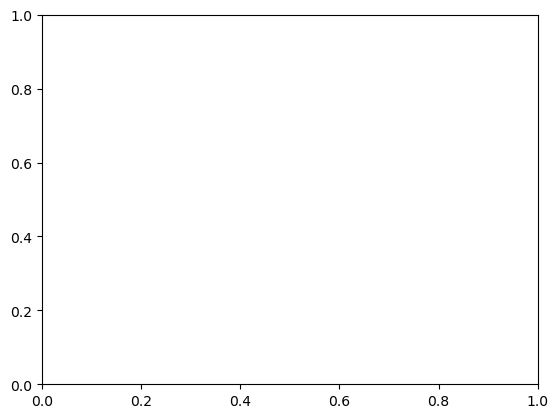

In [38]:
# Looping variables so we can plot warehouses and indicators of social vulnerability
variables = ['total population',
           'day population',
           'minority rank',
           'below 200% poverty rank',
           'No hs diploma rank',
           'Unemployed rank',
           'Renter rank',
           'Households less than $75k rank',
           'Uninsured rank',
           'No internet rank',
           'Over 65 rank',
           'Under 17 rank',
           'Disability rank',
           'Speak limited english rank',
           'Mobile home rank']
for variable in variables:
    ax = eji2.plot(column=variable, edgecolor="white", legend=True)
    wh_parc_g.centroid.plot(ax=ax, color='orange', markersize=3);
    ax.set_title(variable)
    ax.set_axis_off()
    ctx.add_basemap(ax, crs=4326)